# Data Preprocessing for Epi. Modelling

In [239]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify
import matplotlib.ticker as ticker
from datetime import timedelta

%matplotlib inline

## Geo Data Processsing

Reading the initial zone shapefile and grouped zone (by FV)

In [240]:
#Handle naming and grouping
gpdzs = gpd.read_file('../../data/GEO DRC/RDC_ZonesDeSante.shp')[['PROVINCE','Nom','geometry']]
gpdzsg = gpd.read_file('../../data/GEO DRC/RDC_Micro_ZonesDeSante_Regroupees.shp')[['PROVINCE','Zone+Peupl','geometry']]

gpdzsg = gpdzsg.rename({'Zone+Peupl':'Nom'}, axis=1)
# gpdzsg['Nom'] =  gpdzsg['Nom']+'_g'



# gpdzm = gpd.GeoDataFrame(pd.concat([gpdzs,gpdzsg], ignore_index=True), crs=gpdzsg.crs)

In [241]:
gpdzsg

,PROVINCE,Nom,geometry
0,Sud-Ubangi,Tandala,"POLYGON ((18.68941 1.90628, 18.68649 1.90233, ..."
1,Sud-Ubangi,Zongo,"POLYGON ((18.67816 3.97665, 18.66909 3.96872, ..."
2,Nord-Ubangi,Bili,"POLYGON ((19.42578 3.89935, 19.41802 3.89628, ..."
3,Nord-Ubangi,Gbadolite,"POLYGON ((20.86461 4.06245, 20.86071 4.06242, ..."
4,Nord-Ubangi,Loko,"POLYGON ((21.35464 3.39852, 21.35367 3.39739, ..."
...,...,...,...
310,Ituri,Aru,"POLYGON ((30.65123 2.14049, 30.65002 2.13740, ..."
311,Ituri,Adi,"POLYGON ((30.78577 3.29087, 30.77890 3.29006, ..."
312,Ituri,Ariwara,"POLYGON ((30.45461 2.91338, 30.43551 2.91118, ..."
313,Haut-Uele,Aba,"POLYGON ((30.20675 2.59240, 30.18471 2.58432, ..."


### Checking for data issues

There are two zones with name `Lubunga`, but belonging to two provinces `Kasai-Central and Tshopo`

In [242]:
gpdzsg[gpdzsg.Nom == 'Lubunga']

,PROVINCE,Nom,geometry
116,KasaÃ¯-Central,Lubunga,"POLYGON ((23.39482 -5.78318, 23.39455 -5.78329..."
265,Tshopo,Lubunga,"POLYGON ((25.04286 0.13055, 25.02048 0.12382, ..."


In [243]:
# gpdzm.to_file('merged_zones', driver='ESRI Shapefile')

In [244]:
# gpdzs_merged = gpd.read_file('data/merged_zones/merged_zones.shp')

In [245]:
# gpdzs_merged

In [246]:
# gpdzm

### Dictionnary of zones as grouped by FV

In [247]:
#Grouped Zone de Sante (By FV)
groupedzs = {
    'Tshela':['Tshela','Kizu'],
    'Matadi':['Matadi', 'Nzanza'],
    'Mbanza-Ngungu':['Mbanza-Ngungu','Gombe-Matadi'],
    'Kisantu':['Kisantu','Nselo'],
    'Ngidinga':['Ngidinga','Kimvula'],
    'Maluku I': ['Maluku I','Maluku II'],
    'Kikimi':['Kikimi', 'Biyela'],
    'Kimbanseke':['Kimbanseke', 'Kingasani'],
    'Lemba':['Lemba','Ngaba'],
    'Kokolo': ['Kokolo','Bandalungwa'],
    'Police':['Police','Lingwala'],
    'Boko': ['Boko','Popokabaka','Kimbau'],
    'Kahemba':['Kahemba','Kajiji','Kisanji'],
    'Gungu':['Gungu','Mungindu','Kingandu'],
    'Idiofa':['Idiofa','Koshibanda','Mukedi'],
    'Mokala': ['Mokala','Kimputu','Ipamu'],
    'Kikwit-Sud':['Kikwit-Nord', 'Kikwit-Sud','Lusanga'],
    'Vanga':['Yasa-Bonga','Mosango','Pay Kongila','Masi-Manimba','Moanza','Vanga'],
    'Bolobo':['Bolobo','Kwamouth'],
    'Mushie':['Yumbi','Mushie','Banjow Moke'],
    'Bokoro':['Inongo','Penjwa','Kiri','Bokoro','Bosobe','Mimia','Oshwe'],
    'Kitangwa': ['Kitangwa', 'Nyanga'],
    'Kamonia':['Kamonia', 'Kanzala'],
    'Luebo': ['Luebo','Ndjoko-Mpunda'],
    'Ilebo': ['Dekese','Ilebo','Mushenge','Bulape','Kakenge'],
    'Bena Tshiadi': ['Bena Tshiadi','Muetshi','Katende'],
    'Kananga':['Kananga','Katoka','Lukonga','Bobozo','Tshikaji','Tshikula'],
    'Luambo' : ['Luambo','Kalomba','Tshibala'],
    'Manika' : ['Manika','Panda','Kilela Balanda'],
    'Likasi' : ['Kambove','Likasi'],
    'Kampemba':['Kampemba','Mumbunda','Kisanga',"Katuba",'Kenya'],
    'Lubumbashi':['Lubumbashi','Vangu','Kowe','Kamalondo'],
    'Rwashi': ['Rwashi','Kafubu'],
    'Kikula':['Kikula','Lukafu','Kasenga'],
    'Mufunga Sampwe': ['Mufunga Sampwe','Mitwaba'],
    'Kamina':['Kamina','Songa'],
    'Kabongo': ['Kayamba','Kabongo'],
    'Moba': ['Kiyambi','Kansimba','Moba'],
    'Kongolo': ['Kongolo','Mbulula'],
    'Ngandajika':['Ngandajika','Kalambayi Kabanga'],
    'Mwene Ditu': ['Mwene Ditu', 'Makota'],
    'Kalenda': ['Kalenda','Wikong'],
    'Diulu': ['Diulu','Mpokolo','Bipemba','Nzaba','Kansele','Lubilanji','Dibindi','Muya','Lukelenge','Tshitenge','Bonzola'],
    'Ototo': ['Ototo','Lusambo','Pania Mutombo'],
    'Omendjadi': ['Omendjadi', 'Tshudi Loto','Bena Dibele'],
    'Kunda': ['Kunda','Kibombo','Tunda'],
    'Kampene': ['Kampene','Pangi'],
    'Kindu' : ['Kindu','Alunguli'],
    'Punia': ['Punia','Ferekeni','Obokote'],
    'Shabunda': ['Shabunda','Lulingu','Mulungu'],
    'Fizi':['Fizi','Kimbi Lulenge'],
    'Mwenga': ['Mwenga','Mwana'],
    'Walungu': ['Walungu','Kaniola','Mubumbano'],
    'Nyangezi': ['Nyangezi', 'Kaziba','Nyantende'],
    'Ibanda': ['Bagira', 'Kadutu', 'Ibanda'],
    'Idjwi' : ['Idjwi','Miti-Murhesa'],
    'Minova': ['Minova','Kalehe',],
    'Bikoro': ['Bikoro','Lukolela','Irebu','Ntondo','Iboko','Ingende'],
    'Wangata': ['Wangata','Bolenge','Mbandaka'],
    'Bolomba': ['Bolomba','Lotumbe','Monieka','Basankusu','Djombo','Lolanga Mampoko','Makanza','Bomongo','Lilanga Bobangi'],
    'Boende': ['Djolu','Ikela','Bosanga','Yalifafo','Bokungu','Wema','Befale','Monkoto','Lingomo','Boende','Mompono'],
    'Basoko': ['Basoko', 'Basali','Yalimbongo'],
    'Yaleko':['Yaleko','Yahisuli','Opala','Lowa'],
    'Makiso-Kisangani': ['Makiso-Kisangani','Mangobo'],
    'Kabondo': ['Kabondo','Tshopo'],
    'Bafwasende': ['Bafwasende','Bafwagbogbo', 'Opienge'],
    'Itebero': ['Itebero','Walikale','Kibua'],
    'Masisi': ['Masisi','Katoyi'],
    'Rutshuru': ['Rutshuru','Bambo'],
    'Kayna':['Kayna','Pinga'],
    'Katwa': ['Butembo','Katwa'],
    'Beni':['Beni','Mabalako','Kalunguta'],
    'Tandala': ["Boto",'Mawuya','Kungu','Bwamanda','Bogosenubia','Bokonzi','Libenge','Tandala'],
    'Bangabola': ['Budjala','Bangabola'],
    'Gemena': ['Bulu', 'Gemena'],
    "Ndage": ['Mbaya','Ndage'],
    "Bili": ['Bili','Bosobolo'],
    'Loko': ['Loko','Mbaya','Yakoma','Mobayi Mbongo','Wasolo','Ndage'],
    'Businga': ['Businga','Abuzi','Wapinda'],
    'Yambuku': ['Yambuku','Yamaluka','Boso Manzi'],
    'Buta': ['Buta','Titule','Aketi','Bili','Ganga'],
    'Poko': ["Ango",'Poko','Viadana'],
    'Isiro':['Boma-Mangbetu','Pawa','Isiro'],
    'Aba':['Makoro','Aba','Faradje'],
    'Komanda': ['Boga','Komanda','Mandima','Lolwa'],
    'Bunia':['Lita','Rwampara','Kilo','Nizi','Bambu','Bunia'],
    'Mongbalu':['Mongbalu','Damas'],
    'Drodro': ['Jiba','Drodro','Tchomia','Fataki'],
    'Angumu': ['Angumu','Linga'],
    'Logo': ['Logo','Rimba','Rethy'],
    'Aru': ['Aru','Biringi','Aungba','Kambala'],
    'Ariwara': ['Ariwara','Laybo','Adja'],
    'Businga': ['Businga','Abuzi'],
    'Loko':['Mobayi Mbongo','Loko','Wasolo','Yakoma'],
    'Bili': ['Bili','Bosobolo'],
    'Kikongo': ['Bandundu','Kikongo','Bagata','Sia'],
    'Karisimbi':['Karisimbi','Goma']
}

#inverse of here above dictionnary
groupedzs_inv = { nk:k for k,v in groupedzs.items() for nk in groupedzs[k]}

In [248]:
# groupedzs_inv

In [249]:
len(list(groupedzs.keys()))

94

In [250]:
# gpdzsg
# list(groupedzs.values())

In [251]:
# gpdzs[gpdzs['Nom'].str.contains('lolanga Mampoko')]

### Checking that names are identical between grouped and initial zones names

In [252]:
dict_values = groupedzs.values()
[ll for l in dict_values for ll in l if ll not in list(gpdzs['Nom'])]

[]

In [253]:
[l for l in list(groupedzs.keys()) if l not in list(gpdzs['Nom'])]

[]

In [254]:
gpdzs[gpdzs['Nom'].isin(list(groupedzs.keys()))]

,PROVINCE,Nom,geometry
8,Sankuru,Omendjadi,"POLYGON ((23.21803 -2.82069, 23.21806 -2.82070..."
15,Lomami,Ngandajika,"POLYGON ((24.05875 -6.59590, 24.05968 -6.59664..."
25,Lomami,Mwene Ditu,"POLYGON ((23.42479 -6.84026, 23.42636 -6.84344..."
33,Kasaï-Oriental,Diulu,"POLYGON ((23.60459 -6.08763, 23.60496 -6.08791..."
45,Lomami,Kalenda,"POLYGON ((23.28343 -6.91904, 23.28344 -6.91906..."
...,...,...,...
480,Haut-Katanga,Likasi,"POLYGON ((26.77943 -10.94987, 26.80381 -10.951..."
503,Tshuapa,Boende,"POLYGON ((21.41563 0.08691, 21.41563 0.08691, ..."
508,Equateur,Wangata,"POLYGON ((18.24467 0.00159, 18.24453 0.00167, ..."
510,Equateur,Bolomba,"POLYGON ((19.21606 1.11853, 19.22244 1.11224, ..."


In [255]:
# gpdzs_merged[gpdzs_merged['Nom'] == 'Makala'].iloc[0]['geometry']

In [256]:
# gpdzs_merged[gpdzs_merged['Nom'].isin(['Nsele','Nsele_g'])]['geometry']

In [257]:
# gpdzs_merged[gpdzs_merged['Nom'].isin(['Nsele'])].plot()
# gpdzs_merged[gpdzs_merged['Nom'].isin(['Nsele_g'])].plot()

In [258]:
# gpdzs_merged[gpdzs_merged['Nom'] == 'Makala_g'].iloc[0]['geometry'].interiors.

In [259]:
# gpdzm

In [260]:
# gpdzs_merged[gpdzs_merged['Nom'] == 'Makala'].iloc[0]['geometry'].covers(gpdzs_merged[gpdzs_merged['Nom'] == 'Makala'].iloc[0]['geometry'])

In [261]:
# gpdzs[gpdzs['Nom'] == 'Kikimi'].iloc[0]['geometry'].covers(gpdzsg[gpdzsg['Zone+Peupl'] == 'Kikimi'].iloc[0]['geometry'])

In [262]:
# gpdzsg

In [263]:
# gdf_intersects = gpd.overlay(gpdzs,gpdzsg)

In [264]:
# gdf_intersects[gdf_intersects.Nom_1 == 'Boende']

In [265]:
# gpdzsg.covered(gpdtouches[gpdtouches['Zone+Peupl'] == 'Kokolo'].iloc[0]['geometry'])

In [266]:
# gdf_intersects = gpd.overlay(gpdzs,gpdzsg)

In [267]:
# gpd_dict = dict()
# for index, z in gpdzsg.iterrows():
#     gsz = gpd.GeoSeries(z['geometry'])
#     gpd_dict [z['Zone+Peupl']] = list()
#     for index2, zz in gdf_intersects[gdf_intersects['Zone+Peupl'] == z['Zone+Peupl']].iterrows():
#         gszz = gpd.GeoSeries(zz['geometry'])
# #         print(gsz.covers(gszz))
#         if (gsz.covers(gszz)):
#             print(True)
# #             gpd_dict [z['Zone+Peupl']].append(z['Nom'])

In [268]:
# gdf_intersects

In [269]:
# gdf_intersects[(gdf_intersects.PROVINCE_1 == 'Kinshasa') & (gdf_intersects['Zone+Peupl'] == 'Kokolo')]

In [270]:
# gpdtouches

In [271]:
# # gpdzsg.touches(gpdzsg[gpdzsg['Zone+Peupl'] == 'Kokolo']['geometry'])
# gpdtouches = gpdzsg
# mask = gpdtouches.touches(gpdtouches[gpdtouches['Zone+Peupl'] == 'Kokolo'].iloc[0]['geometry'])
# gpdtouches[mask]

In [272]:
# gpd_dict = dict()
# for z in gdf_intersects.groupby('Zone+Peupl').groups.keys():
#     gdf_intersects_z = gdf_intersects[(gdf_intersects['Zone+Peupl'] == z)]
#     mask = gpdtouches.touches(gpdtouches[gpdtouches['Zone+Peupl'] == z].iloc[0]['geometry'])
#     gpd_dict[z] = set(list(gdf_intersects_z['Nom'])) - set(list(gpdtouches[mask]['Zone+Peupl']))
#     print(z)

In [273]:
# gpd_dict['Masina II']

In [274]:
# gpdzs

In [275]:
# mask = gpdzs.touches(gpdzsg.loc[71,'geometry'])
# gpdzs[mask]

In [276]:
# mask = gpdzs.intersects(gpdzsg.loc[71,'geometry'])
# gpdzs[mask]

In [277]:
# gpdzsg[(gpdzsg.PROVINCE == 'Kinshasa') & (gpdzsg['Zone+Peupl'] == 'Kokolo')]

In [278]:
#read Geo Data
# ./data/GEO DRC/RDC_Micro_ZonesDeSante_Regroupees.shp
# gpd.read_file('../../data/GEO DRC/RDC_ZonesDeSante.shp')
zone_gd = gpdzsg
zone_gd

,PROVINCE,Nom,geometry
0,Sud-Ubangi,Tandala,"POLYGON ((18.68941 1.90628, 18.68649 1.90233, ..."
1,Sud-Ubangi,Zongo,"POLYGON ((18.67816 3.97665, 18.66909 3.96872, ..."
2,Nord-Ubangi,Bili,"POLYGON ((19.42578 3.89935, 19.41802 3.89628, ..."
3,Nord-Ubangi,Gbadolite,"POLYGON ((20.86461 4.06245, 20.86071 4.06242, ..."
4,Nord-Ubangi,Loko,"POLYGON ((21.35464 3.39852, 21.35367 3.39739, ..."
...,...,...,...
310,Ituri,Aru,"POLYGON ((30.65123 2.14049, 30.65002 2.13740, ..."
311,Ituri,Adi,"POLYGON ((30.78577 3.29087, 30.77890 3.29006, ..."
312,Ituri,Ariwara,"POLYGON ((30.45461 2.91338, 30.43551 2.91118, ..."
313,Haut-Uele,Aba,"POLYGON ((30.20675 2.59240, 30.18471 2.58432, ..."


In [279]:
(set(zone_gd['PROVINCE']))

{'Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Ituri',
 'KasaÃ¯',
 'KasaÃ¯-Central',
 'KasaÃ¯-Oriental',
 'Kinshasa',
 'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Maniema',
 'MaÃ¯-Ndombe',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa'}

### Filter a subset of zones for analysis

In [280]:
zone_w_issue = list(zone_gd[zone_gd['PROVINCE'].isin(['Sankuru','Tshopo','KasaÃ¯-Central'])]['Nom'])
zone_w_issue

['Bena Tshiadi',
 'Bena Leka',
 'Demba',
 'Ndekesha',
 'Mikalayi',
 'Bunkonde',
 'Kananga',
 'Mutoto',
 'Lubunga',
 'Minga',
 'Ototo',
 'Dikungu',
 'Tshumbe',
 'Yangala',
 'Masuika',
 'Dibaya',
 'Lubondaie',
 'Luiza',
 'Bilomba',
 'Luambo',
 'Katako Kombe',
 'Wembo Nyama',
 'Djalo Djeka',
 'Lodja',
 'Vanga Kete',
 'Kole',
 'Omendjadi',
 'Lomela',
 'Yabaondo',
 'Makiso-Kisangani',
 'Lubunga',
 'Ubundu',
 'Yaleko',
 'Wanierukula',
 'Banalia',
 'Bengamisa',
 'Kabondo',
 'Yakusu',
 'Isangi',
 'Basoko',
 'Yahuma',
 'Bafwasende']

In [281]:
#Filter geo data
zone_filtered_gd = zone_gd[zone_gd['PROVINCE'].isin(
    [
        'Bas-Uele',
 'Equateur',
 'Haut-Katanga',
 'Haut-Lomami',
 'Haut-Uele',
 'Ituri',
 'KasaÃ¯',
 'KasaÃ¯-Central',
 'KasaÃ¯-Oriental',
 'Kinshasa',
'Kongo-Central',
 'Kwango',
 'Kwilu',
 'Lomami',
 'Lualaba',
 'Maniema',
 'MaÃ¯-Ndombe',
 'Mongala',
 'Nord-Kivu',
 'Nord-Ubangi',
 'Sankuru',
 'Sud-Kivu',
 'Sud-Ubangi',
 'Tanganyika',
 'Tshopo',
 'Tshuapa'
    ]) ]
# zone_filtered_gd[zone_filtered_gd['PROVINCE'] == 'Sud-Kivu']

In [282]:
list_filtered_zones = list(zone_filtered_gd['Nom'])
print(list_filtered_zones,'size:',len(list_filtered_zones))

['Tandala', 'Zongo', 'Bili', 'Gbadolite', 'Loko', 'Karawa', 'Bominenge', 'Gemena', 'Bangabola', 'Binga', 'Ndage', 'Lisala', 'Pimu', 'Bongandanga', 'Boso Mondanda', 'Bikoro', 'Wangata', 'Bolomba', 'Boende', 'Bokoro', 'Ilebo', 'Nioki', 'Mushie', 'Ntandembelo', 'Kikongo', 'Bolobo', 'Tshela', 'Kinkonzi', 'Seke-Banza', 'Vaku', 'Kuimba', 'Moanda', 'Kitona', 'Boma', 'Boma Bungu', 'Lukula', 'Kangu', 'Inga', 'Nsona-Mpangu', 'Matadi', 'Kimpese', 'Kibunzi', 'Luozi', 'Mangembo', 'Mont Ngafula II', 'Masa', 'Mbanza-Ngungu', 'Sona-Bata', 'Kisantu', 'Nsele', 'Mont Ngafula I', 'Binza Meteo', 'Makala', 'Selembao', 'Kisenso', 'Lemba', 'Matete', 'Ndjili', 'Kimbanseke', 'Kikimi', 'Masina II', 'Masina I', 'Kingabwa', 'Kalamu I', 'Limete', 'Barumbu', 'Kinshasa', 'Kalamu II', 'Kasa-Vubu', 'Police', 'Gombe', 'Kokolo', 'Ngiri-Ngiri', 'Bumbu', 'Kintambo', 'Binza Ozone', 'Maluku I', 'Ngidinga', 'Boko', 'Kimpangu', 'Boko-Kivulu', 'Kwilu-Ngongo', 'Kasongo Lunda', 'Mutena', 'Kamonia', 'Tshikapa', 'Tembo', 'Panzi', '

## Epidemiological Data Processing

In [283]:
# read csv file
df_epi = pd.read_csv('./data/inrbdata.csv',sep = ',')
df_epi

,Date,Zone de Santé,Cas confirmés,Provinces
0,3/22/2020,Gombe,19.0,Kinshasa
1,3/22/2020,Kinshasa,3.0,Kinshasa
2,3/22/2020,Kintambo,3.0,Kinshasa
3,3/22/2020,Binza Ozone,2.0,Kinshasa
4,3/22/2020,Kasavubu,2.0,Kinshasa
...,...,...,...,...
3831,7/31/2020,Matete,2.0,Kinshasa
3832,7/31/2020,Kalamu 1,1.0,Kinshasa
3833,7/31/2020,Ngiri-Ngiri,1.0,Kinshasa
3834,7/31/2020,Bunia,1.0,Ituri


Grouping epi data by `Zones` and `Provinces`

In [284]:
df_epi_agg = df_epi.groupby(['Zone de Santé','Provinces'], as_index=False).sum()
df_epi_agg

,Zone de Santé,Provinces,Cas confirmés
0,Bafwasende,Tshopo,1.0
1,Bagira,Sud Kivu,17.0
2,Bandalungwa,Kinshasa,201.0
3,Bandundu,Kwilu,4.0
4,Barumbu,Kinshasa,130.0
...,...,...,...
114,Vaku,Kongo Central,2.0
115,Walikale,Nord Kivu,10.0
116,Wangata,Equateur,5.0
117,Watsa,Haut Uélé,35.0


In [285]:
# Sum cases
df_epi_agg.sum()

Zone de Santé    BafwasendeBagiraBandalungwaBandunduBarumbuBeni...
Provinces        TshopoSud KivuKinshasaKwiluKinshasaNord KivuNo...
Cas confirmés                                                 9340
dtype: object

### Renaming and  matching

In [286]:
# Renaming some elements to match with those in  Geo data
def renamed_zs(zs, els):
    zrn = zs
    for vtr in els:
        zrn = zrn.replace(vtr[0], vtr[1])
    return zrn

In [287]:
list_zone_de_sante_inrb = list(df_epi_agg.groupby('Zone de Santé').groups.keys())

In [288]:
for idx in list(df_epi_agg.index[df_epi_agg['Zone de Santé'].str.contains('1|2')]):
    df_epi_agg.at[idx,'Zone de Santé'] = renamed_zs(df_epi_agg.iloc[idx]['Zone de Santé'], [('1','I'),('2','II')])
    

### Spelling Correction 

In [289]:

corrected_list = [('Kokolo (Ndolo)','Kokolo'),
                  ('Mont-Ngafula I','Mont Ngafula I'), 
                  ('Mont-Ngafula II','Mont Ngafula II'),  
                  ('N\'sele','Nsele'), ('Binza Méteo','Binza Meteo'), 
                  ('Kasavubu','Kasa-Vubu'), ('N\'djili','Ndjili'), 
                  
                 ('Boko Kivulu','Boko-Kivulu'),
                  ('Bonga Yasa','Yasa-Bonga'),
                  ('Sonabata','Sona-Bata'),
                  ('Sekebanza','Seke-Banza'),
                  ('Nyirangongo','Nyiragongo'),
                  ('Nyankunde','Nyakunde'),
                  ('Mumbanda','Mumbunda'),
                  ('Miti Murhesa','Miti-Murhesa'),
                  ('Miti murhesa','Miti-Murhesa'),
                  ('Mbanza ngungu','Mbanza-Ngungu'),
                  ('Mbanza Ngungu','Mbanza-Ngungu'),
                  ('Kwilu Ngongo','Kwilu-Ngongo'),
                  ('Kwilungongo','Kwilu-Ngongo'),
                  ('Makiso','Makiso-Kisangani'),
                  ('Kinsenso','Kisenso'),
                  ('Muanda','Moanda')
                 ]
correction_dict = {k:v for k,v in corrected_list}
# .str.contains('|'.join(['Mont','sele','Binza','djili','Kasa','Kokolo']))
for idx in list(df_epi_agg.index[df_epi_agg['Zone de Santé'].isin([el[0] for el in corrected_list])]):
    df_epi_agg.at[idx,'Zone de Santé'] = correction_dict[df_epi_agg.iloc[idx]['Zone de Santé']]
#     renamed_zs(df_epi_agg.iloc[idx]['Zone de Santé'], corrected_list)

### Matching epi data zone names to zones names as provided by FV

In [290]:
for idx in list(df_epi_agg.index[df_epi_agg['Zone de Santé'].isin(groupedzs_inv.keys())]):
#     print((df_epi_agg.iloc[idx]['Zone de Santé'],groupedzs_inv[df_epi_agg.iloc[idx]['Zone de Santé']]))
    df_epi_agg.at[idx,'Zone de Santé'] = groupedzs_inv[df_epi_agg.iloc[idx]['Zone de Santé']]

In [291]:
df_epi_agg = df_epi_agg.groupby(['Zone de Santé','Provinces'], as_index=False).sum()
df_epi_agg

,Zone de Santé,Provinces,Cas confirmés
0,Bafwasende,Tshopo,1.0
1,Barumbu,Kinshasa,130.0
2,Beni,Nord Kivu,7.0
3,Binza,Nord Kivu,1.0
4,Binza Meteo,Kinshasa,361.0
...,...,...,...
95,Vaku,Kongo Central,2.0
96,Vanga,Kwilu,1.0
97,Wangata,Equateur,5.0
98,Watsa,Haut Uélé,35.0


In [292]:
list_zone_de_sante_inrb = list(df_epi_agg.groupby('Zone de Santé').groups.keys())

### Zones in Epi data but not in Zones FV shp

In [293]:
#Check mismatching zones
missingzones = [l for l  in list_zone_de_sante_inrb if l not in list(gpdzs['Nom'])];missingzones

['Bukavu',
 'Himbi',
 'Kasai Central',
 'Kasindi',
 'Kasumbalesa',
 'Kidushi',
 'Lukala',
 'Madula',
 'Mvuzi',
 'ZS indeterminée']

#### Cases in those zones

In [294]:
df_epi[df_epi['Zone de Santé'].isin(missingzones)].groupby(['Zone de Santé','Provinces'],as_index = False).sum()

,Zone de Santé,Provinces,Cas confirmés
0,Bukavu,Sud Kivu,1.0
1,Himbi,Nord Kivu,2.0
2,Kasai Central,Kasai Central,1.0
3,Kasindi,Nord Kivu,3.0
4,Kasumbalesa,Haut Katanga,2.0
5,Kidushi,Haut Katanga,1.0
6,Lukala,Kongo Central,3.0
7,Madula,Tshopo,2.0
8,Mvuzi,Kongo Central,1.0
9,ZS indeterminée,Kinshasa,1278.0


### Drop those zones for now

`TODO` see what to do with those later on

In [295]:
df_epi_agg = df_epi_agg.drop(df_epi_agg.index[df_epi_agg['Zone de Santé'].isin(missingzones)])
df_epi_agg

,Zone de Santé,Provinces,Cas confirmés
0,Bafwasende,Tshopo,1.0
1,Barumbu,Kinshasa,130.0
2,Beni,Nord Kivu,7.0
3,Binza,Nord Kivu,1.0
4,Binza Meteo,Kinshasa,361.0
...,...,...,...
94,Uvira,Sud Kivu,1.0
95,Vaku,Kongo Central,2.0
96,Vanga,Kwilu,1.0
97,Wangata,Equateur,5.0


### Check zones left

In [296]:
# list_filtered_zones

In [297]:
#Check mismatching zones
list_zone_de_sante_inrb = list(df_epi_agg.groupby('Zone de Santé').groups.keys())
[l for l  in list_zone_de_sante_inrb if l not in list_filtered_zones]

[]

### Zones with 0 case

In [298]:
#Zone with 0 case
zs_none_touched = [l for l  in list_filtered_zones if l not in list_zone_de_sante_inrb]
print(zs_none_touched,len(zs_none_touched))

['Tandala', 'Zongo', 'Bili', 'Gbadolite', 'Loko', 'Karawa', 'Bominenge', 'Bangabola', 'Binga', 'Ndage', 'Lisala', 'Pimu', 'Bongandanga', 'Boso Mondanda', 'Bikoro', 'Bolomba', 'Boende', 'Bokoro', 'Ilebo', 'Nioki', 'Mushie', 'Ntandembelo', 'Bolobo', 'Tshela', 'Kinkonzi', 'Kuimba', 'Kitona', 'Boma Bungu', 'Nsona-Mpangu', 'Kibunzi', 'Mangembo', 'Ngidinga', 'Boko', 'Kimpangu', 'Kasongo Lunda', 'Mutena', 'Kamonia', 'Tembo', 'Kitenda', 'Wamba Lwadi', 'Kahemba', 'Gungu', 'Feshi', 'Mwela Lembwa', 'Djuma', 'Kikwit-Sud', 'Bulungu', 'Mokala', 'Mikope', 'Kitangwa', 'Banga Lubaka', 'Kalonda Ouest', 'Kamwesha', 'Luebo', 'Mweka', 'Bena Tshiadi', 'Bena Leka', 'Demba', 'Ndekesha', 'Mikalayi', 'Bunkonde', 'Kananga', 'Mutoto', 'Lubunga', 'Mukumbi', 'Kabeya Kamuanga', 'Cilundu', 'Tshishimbi', 'Miabi', 'Diulu', 'Tshilenge', 'Bibanga', 'Minga', 'Ototo', 'Dikungu', 'Tshumbe', 'Tshofa', 'Samba', 'Kamana', 'Lubao', 'Kalonda Est', 'Ludimbi Lukula', 'Kabinda', 'Ngandajika', 'Kitenge', 'Kabongo', 'Kinkondja', 'Kab

In [299]:
df_zs_none_touched = gpdzsg[~gpdzsg.Nom.isin(list_zone_de_sante_inrb)][['PROVINCE','Nom']]
df_zs_none_touched['Cas confirmés'] = 0
df_zs_none_touched = df_zs_none_touched.rename({'Nom':'Zone de Santé','PROVINCE':'Provinces'},axis=1)
df_zs_none_touched

,Provinces,Zone de Santé,Cas confirmés
0,Sud-Ubangi,Tandala,0
1,Sud-Ubangi,Zongo,0
2,Nord-Ubangi,Bili,0
3,Nord-Ubangi,Gbadolite,0
4,Nord-Ubangi,Loko,0
...,...,...,...
310,Ituri,Aru,0
311,Ituri,Adi,0
312,Ituri,Ariwara,0
313,Haut-Uele,Aba,0


In [300]:
df_epi_agg = pd.concat([df_epi_agg,df_zs_none_touched], ignore_index=True)
df_epi_agg

,Zone de Santé,Provinces,Cas confirmés
0,Bafwasende,Tshopo,1.0
1,Barumbu,Kinshasa,130.0
2,Beni,Nord Kivu,7.0
3,Binza,Nord Kivu,1.0
4,Binza Meteo,Kinshasa,361.0
...,...,...,...
311,Aru,Ituri,0.0
312,Adi,Ituri,0.0
313,Ariwara,Ituri,0.0
314,Aba,Haut-Uele,0.0


In [301]:
df_epi_agg[df_epi_agg.duplicated()]

,Zone de Santé,Provinces,Cas confirmés


In [302]:
# df_epi_agg[df_epi_agg['Zone de Santé'] == 'Bandalungwa']

In [303]:
# zone_filtered_gd[zone_filtered_gd.PROVINCE == 'Kinshasa'][['PROVINCE','Zone+Peupl']].sort_values('Zone+Peupl')

In [304]:
len([l for l in list_zone_de_sante_inrb if l in list_filtered_zones])

89

In [305]:
len(set(list_filtered_zones))

314

In [306]:
# [l for l  in list(df_epi_agg['Zone de Santé']) if l not in  list_filtered_zones]

### Save Epidata to csv

In [307]:
df_epi_agg = df_epi_agg.groupby(['Zone de Santé'], as_index=False).sum()
df_epi_agg

,Zone de Santé,Cas confirmés
0,Aba,0.0
1,Adi,0.0
2,Alimbongo,0.0
3,Angumu,0.0
4,Ankoro,0.0
...,...,...
309,Yaleko,0.0
310,Yambuku,0.0
311,Yamongili,0.0
312,Yangala,0.0


In [308]:
# Check duplicated zones
check_list = list()
for el in list_filtered_zones:#list(df_epi_agg['Zone de Santé']):
    if (el in check_list):
        print(el)
    else:
        check_list.append(el)

Lubunga


In [309]:
len(list_filtered_zones),len(list(df_epi_agg['Zone de Santé']))

(315, 314)

In [310]:
set(list_filtered_zones) == set(list(df_epi_agg['Zone de Santé']))

True

In [311]:
len(set(list_filtered_zones))

314

In [312]:
len(set(list(df_epi_agg['Zone de Santé'])))

314

In [313]:
[ el for el in list_filtered_zones if el not in  list(df_epi_agg['Zone de Santé'])]

[]

#### Save only filtered zones

In [314]:
df_epi_agg_fil = df_epi_agg[df_epi_agg['Zone de Santé'].isin(list_filtered_zones)][['Zone de Santé','Cas confirmés']]
df_epi_agg_fil = pd.DataFrame(df_epi_agg_fil)
# df_epi_agg_fil['patIDs'] = [i+1 for i in range(len(list_filtered_zones))]#df_epi_agg_fil.shape[0])]
df_epi_agg_fil['patIDs'] = [i+1 for i in range(df_epi_agg_fil.shape[0])]#df_epi_agg_fil.shape[0])]
df_epi_agg_fil = df_epi_agg_fil.rename(columns={'Zone de Santé':'patNames'})
df_epi_agg_fil

,patNames,Cas confirmés,patIDs
0,Aba,0.0,1
1,Adi,0.0,2
2,Alimbongo,0.0,3
3,Angumu,0.0,4
4,Ankoro,0.0,5
...,...,...,...
309,Yaleko,0.0,310
310,Yambuku,0.0,311
311,Yamongili,0.0,312
312,Yangala,0.0,313


In [315]:
#save to csv
# './epidemiological model/BEARmod/DRCexample/data/epidata.csv'
df_epi_agg_fil.to_csv('./epidemiological_model/BEARmod_DRC/data/epidata.csv')

In [316]:
df_epi_agg_fil.to_clipboard(True)

In [317]:
#['Destination','deltaVolume_x_plus_y_x_y']
# df_obs_agg_merge

# df_epi_reduc_agg_fil = df_epi_agg_fil.merge(df_obs_agg_merge[['Destination','deltaVolume_x_plus_y_x_y']], left_on='Zone de Santé', right_on='Destination')
# df_epi_reduc_agg_fil.rename(columns={'deltaVolume_x_plus_y_x_y'})

In [318]:
df_epi_agg_fil

,patNames,Cas confirmés,patIDs
0,Aba,0.0,1
1,Adi,0.0,2
2,Alimbongo,0.0,3
3,Angumu,0.0,4
4,Ankoro,0.0,5
...,...,...,...
309,Yaleko,0.0,310
310,Yambuku,0.0,311
311,Yamongili,0.0,312
312,Yangala,0.0,313


In [319]:
df_epi_agg_fil['Cas confirmés'].sum()

8046.0

In [320]:
df_pats = df_epi_agg_fil[['patIDs', 'patNames']]
# df_pats = df_pats.rename(columns={'Zone de Santé':'patNames','ids':'patIDs'})
df_pats

,patIDs,patNames
0,1,Aba
1,2,Adi
2,3,Alimbongo
3,4,Angumu
4,5,Ankoro
...,...,...
309,310,Yaleko
310,311,Yambuku
311,312,Yamongili
312,313,Yangala


### Population movement data Processing

In [321]:
# read csv file

df = pd.read_csv('../../data/export_csv/Flux_24h.csv',sep = ';')

# Date Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day'] = df['Date'].dt.weekday

In [322]:
#Filter data for only 3h of Immobility and exclude hors-zone
df = df[(df.Immobility == '3h') & (df.Origin != 'Hors_Zone')]
df

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume,Date_day
5,2020-02-01,Aba,Gombari,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,5957,5
6,2020-02-01,Aba,Gombari,3h,Outside_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,1985,5
7,2020-02-01,Aba,Gombari,3h,Outside_Resident,Study_Zone_Worker,ZoneGlobale,All_modes,871,5
8,2020-02-01,Aba,Gombari,3h,Outside_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1985,5
9,2020-02-01,Aba,Gombari,3h,Destination_Zone_Resident,Outside_Worker,ZoneGlobale,All_modes,1985,5
...,...,...,...,...,...,...,...,...,...,...
48562221,2021-01-03,Yangala,Tshilenge,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,39,6
48562225,2021-01-03,Zongo,Tandala,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,2613,6
48562226,2021-01-03,Zongo,Tandala,3h,Outside_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,1306,6
48562227,2021-01-03,Zongo,Tandala,3h,Outside_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1306,6


### Remove duplicated data

In [323]:
df = df.drop_duplicates()
df

,Date,Origin,Destination,Immobility,Home_Category,Activity_Category,Observation_Zone,Mode,Volume,Date_day
5,2020-02-01,Aba,Gombari,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,5957,5
6,2020-02-01,Aba,Gombari,3h,Outside_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,1985,5
7,2020-02-01,Aba,Gombari,3h,Outside_Resident,Study_Zone_Worker,ZoneGlobale,All_modes,871,5
8,2020-02-01,Aba,Gombari,3h,Outside_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1985,5
9,2020-02-01,Aba,Gombari,3h,Destination_Zone_Resident,Outside_Worker,ZoneGlobale,All_modes,1985,5
...,...,...,...,...,...,...,...,...,...,...
48562221,2021-01-03,Yangala,Tshilenge,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,39,6
48562225,2021-01-03,Zongo,Tandala,3h,Outside_Resident,Outside_Worker,ZoneGlobale,All_modes,2613,6
48562226,2021-01-03,Zongo,Tandala,3h,Outside_Resident,Destination_Zone_Worker,ZoneGlobale,All_modes,1306,6
48562227,2021-01-03,Zongo,Tandala,3h,Outside_Resident,Origin_Zone_Worker,ZoneGlobale,All_modes,1306,6


In [324]:
# Only consider zone Globale (not hotspots)
df_g = df[df.Observation_Zone == 'ZoneGlobale'].groupby(by=['Date','Origin','Destination','Observation_Zone','Date_day'], as_index=0).sum()
df_g

,Date,Origin,Destination,Observation_Zone,Date_day,Volume
0,2020-02-01,Aba,Gombari,ZoneGlobale,5,32953
1,2020-02-01,Aba,Watsa,ZoneGlobale,5,19855
2,2020-02-01,Adi,Aru,ZoneGlobale,5,293
3,2020-02-01,Alimbongo,Beni,ZoneGlobale,5,36
4,2020-02-01,Alimbongo,Katwa,ZoneGlobale,5,237
...,...,...,...,...,...,...
926351,2021-01-03,Yangala,Luputa,ZoneGlobale,6,78
926352,2021-01-03,Yangala,Masuika,ZoneGlobale,6,1486
926353,2021-01-03,Yangala,Mwene Ditu,ZoneGlobale,6,85820
926354,2021-01-03,Yangala,Tshilenge,ZoneGlobale,6,39


### Filter movement data by selected zones

In [326]:
df_filtered_both = df_g[(df_g['Origin'].isin(list_filtered_zones)) & (df_g['Destination'].isin(list_filtered_zones))]
df_filtered_both

,Date,Origin,Destination,Observation_Zone,Date_day,Volume
0,2020-02-01,Aba,Gombari,ZoneGlobale,5,32953
1,2020-02-01,Aba,Watsa,ZoneGlobale,5,19855
2,2020-02-01,Adi,Aru,ZoneGlobale,5,293
3,2020-02-01,Alimbongo,Beni,ZoneGlobale,5,36
4,2020-02-01,Alimbongo,Katwa,ZoneGlobale,5,237
...,...,...,...,...,...,...
926351,2021-01-03,Yangala,Luputa,ZoneGlobale,6,78
926352,2021-01-03,Yangala,Masuika,ZoneGlobale,6,1486
926353,2021-01-03,Yangala,Mwene Ditu,ZoneGlobale,6,85820
926354,2021-01-03,Yangala,Tshilenge,ZoneGlobale,6,39


In [327]:
#Computing Totals Volume for each Origin per day
# df_filtered_both_agg = df_filtered_both.groupby(by = ['Date','Date_day',"Origin"], as_index=False).sum()
# df_filtered_both_agg

In [328]:
# df_filtered_both_mg = df_filtered_both.merge(df_filtered_both_agg,left_on=['Date','Origin'], right_on=['Date','Origin'])
# df_filtered_both_mg

In [329]:
# df_filtered_both_mg['VolumeProp'] = df_filtered_both_mg['Volume_x']/df_filtered_both_mg['Volume_y']
# df_filtered_both_mg#[(df_filtered_both_mg.Origin == 'Kinshasa') & (df_filtered_both_mg.Date == '2020-01-31')]

# Net Mobility

In [330]:
# df_filtered_both = df_g[(df_g['Origin'].isin(list_filtered_zones)) & (df_g['Destination'].isin(list_filtered_zones))]
# df_filtered_both

In [331]:
def filter_df_from_to(start_date, end_date, df):
    mask_base = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    return df.loc[mask_base]

### Net Mobility for each Zone per day

In [332]:
df_filtered_agg_in = df_filtered_both.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
#df_filtered_agg_in[(df_filtered_agg_in.Destination == 'Gombe') & (df_filtered_agg_in.Date == '2020-02-02')]
df_filtered_agg_out = df_filtered_both.groupby(by=['Date','Origin','Date_day'],as_index=0).sum()
#df_filtered_agg_out
df_filtered_agg_in_out = pd.merge(df_filtered_agg_in,df_filtered_agg_out, left_on=['Date','Destination','Date_day'], right_on=['Date','Origin','Date_day'])

#Sum volume inbound and outbound for each zone
df_filtered_agg_in_out['Volume_x_plus_y'] = df_filtered_agg_in_out['Volume_x'] + df_filtered_agg_in_out['Volume_y']
df_filtered_agg_in_out

,Date,Destination,Date_day,Volume_x,Origin,Volume_y,Volume_x_plus_y
0,2020-02-01,Aba,5,49152,Aba,52808,101960
1,2020-02-01,Adi,5,293,Adi,293,586
2,2020-02-01,Alimbongo,5,8435,Alimbongo,8844,17279
3,2020-02-01,Angumu,5,5660,Angumu,7774,13434
4,2020-02-01,Ankoro,5,19006,Ankoro,19403,38409
...,...,...,...,...,...,...,...
89197,2021-01-03,Yahuma,6,12697,Yahuma,7221,19918
89198,2021-01-03,Yakusu,6,7893,Yakusu,6810,14703
89199,2021-01-03,Yambuku,6,51017,Yambuku,54701,105718
89200,2021-01-03,Yangala,6,156956,Yangala,195419,352375


### Splitting data (ref/obs)

In [333]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

# mask_base = (df_filtered_agg_in_out['Date'] >= ref_start_date) & (df_filtered_agg_in_out['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2021-01-29'

# mask_obs = (df_filtered_agg_in_out['Date'] >= obs_start_date) & (df_filtered_agg_in_out['Date'] <= obs_end_date)

df_ref = filter_df_from_to(ref_start_date, ref_end_date,df_filtered_agg_in_out)#df_agg_gen_mob.loc[mask_base]
df_obs = filter_df_from_to(obs_start_date, obs_end_date,df_filtered_agg_in_out)#df_agg_gen_mob.loc[mask_obs]

In [334]:
df_ref_agg = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination'],as_index=0).median()
df_obs_agg = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination'],as_index=0).median()

In [335]:
df_ref_agg.head()

,Destination,Date_day,Volume_x,Volume_y,Volume_x_plus_y
0,Aba,3.0,42992.5,42253.5,86118.0
1,Adi,4.0,30.0,281.0,311.0
2,Alimbongo,3.0,9462.0,9428.5,18914.0
3,Angumu,3.0,4846.0,4891.0,9662.5
4,Ankoro,3.0,17263.5,16752.5,33053.0


In [336]:
df_obs_agg.head()

,Destination,Date_day,Volume_x,Volume_y,Volume_x_plus_y
0,Aba,3.0,23622.0,22256.5,46000.0
1,Adi,3.0,313.5,348.5,676.0
2,Alimbongo,3.0,8852.0,8486.5,17196.0
3,Angumu,3.0,3196.0,3171.0,6348.0
4,Ankoro,3.0,16641.0,17940.0,34752.0


In [337]:
# df_obs_agg_merge = pd.merge(df_ref_agg, df_obs_agg,left_on='Destination', right_on='Destination')
# df_obs_agg_merge['diffVolume_x_plus_y_x_y'] = df_obs_agg_merge['Volume_x_plus_y_y'] - df_obs_agg_merge['Volume_x_plus_y_x']

# df_obs_agg_merge['deltaVolume_x_plus_y_x_y'] = df_obs_agg_merge['diffVolume_x_plus_y_x_y']/df_obs_agg_merge['Volume_x_plus_y_x']*100
# df_obs_agg_merge = df_obs_agg_merge.sort_values('deltaVolume_x_plus_y_x_y')
# df_obs_agg_merge = df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_filtered_zones)]

# #['Destination','deltaVolume_x_plus_y_x_y']
# df_obs_agg_merge
# # df_obs_agg_merge['Destination','deltaVolume_x_plus_y_x_y']

### Movement Reduction

In [338]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Destination == 'Gombe']

,Destination,Date_day,Volume_x,Volume_y,Volume_x_plus_y
449,Gombe,0,439158.0,473805.0,913980.5
450,Gombe,1,441302.0,486129.0,924388.0
451,Gombe,2,436911.5,475902.0,913034.0
452,Gombe,3,433551.0,482590.0,911913.0
453,Gombe,4,445046.0,479344.0,924390.0
454,Gombe,5,308613.0,340794.0,645048.0
455,Gombe,6,128659.0,139881.0,268540.0


In [339]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
# df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Destination == 'Gombe']

In [340]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Destination','Date_day'],right_on=['Destination','Date_day']).sort_values(by='Date')
# df_trend[df_trend.Destination == 'Gombe']
df_trend

,Date,Destination,Date_day,Volume_x_x,Volume_y_x,Volume_x_plus_y_x,Volume_x_y,Volume_y_y,Volume_x_plus_y_y
0,2020-03-19,Aba,3,73280,55262,128542,44485.5,46699.5,92593.0
8204,2020-03-19,Mutshatsha,3,576,547,1123,694.0,860.0,1554.0
8246,2020-03-19,Mutwanga,3,37683,34090,71773,38568.5,35282.5,74900.0
8288,2020-03-19,Mwene Ditu,3,360860,352688,713548,371005.0,362912.5,733917.5
8330,2020-03-19,Mwenga,3,5526,5259,10785,5816.5,5739.5,11556.0
...,...,...,...,...,...,...,...,...,...
42935,2021-01-03,Vanga Kete,6,46859,49262,96121,87834.0,81169.0,169003.0
37988,2021-01-03,Kitangwa,6,19730,21196,40926,3648.0,4788.0,8730.0
34567,2021-01-03,Dibaya,6,50243,56718,106961,63174.0,68791.0,131965.0
34526,2021-01-03,Demba,6,8677,9842,18519,10796.0,12469.0,24316.0


In [341]:
df_trend['deltaV'] = (df_trend['Volume_x_plus_y_x'])/df_trend['Volume_x_plus_y_y'] #- df_trend['Volume_x_plus_y_y']
# df_trend = df_trend[df_trend.Destination == 'Gombe']

# df_trend[(df_trend.Destination == 'Ngiri-Ngiri') & (df_trend.Date == '2020-03-30')]
df_trend

,Date,Destination,Date_day,Volume_x_x,Volume_y_x,Volume_x_plus_y_x,Volume_x_y,Volume_y_y,Volume_x_plus_y_y,deltaV
0,2020-03-19,Aba,3,73280,55262,128542,44485.5,46699.5,92593.0,1.388247
8204,2020-03-19,Mutshatsha,3,576,547,1123,694.0,860.0,1554.0,0.722651
8246,2020-03-19,Mutwanga,3,37683,34090,71773,38568.5,35282.5,74900.0,0.958251
8288,2020-03-19,Mwene Ditu,3,360860,352688,713548,371005.0,362912.5,733917.5,0.972246
8330,2020-03-19,Mwenga,3,5526,5259,10785,5816.5,5739.5,11556.0,0.933281
...,...,...,...,...,...,...,...,...,...,...
42935,2021-01-03,Vanga Kete,6,46859,49262,96121,87834.0,81169.0,169003.0,0.568753
37988,2021-01-03,Kitangwa,6,19730,21196,40926,3648.0,4788.0,8730.0,4.687973
34567,2021-01-03,Dibaya,6,50243,56718,106961,63174.0,68791.0,131965.0,0.810526
34526,2021-01-03,Demba,6,8677,9842,18519,10796.0,12469.0,24316.0,0.761597


In [342]:
df_trend.describe()

,Date_day,Volume_x_x,Volume_y_x,Volume_x_plus_y_x,Volume_x_y,Volume_y_y,Volume_x_plus_y_y,deltaV
count,75963.000000,75963.000000,75963.000000,7.596300e+04,75963.000000,75963.000000,7.596300e+04,75963.000000
mean,3.031871,75110.332886,75092.654937,1.502030e+05,84637.666496,84595.839132,1.693549e+05,0.981566
std,1.988527,103349.719171,103429.972312,2.066422e+05,114420.187592,115029.005070,2.294090e+05,0.669195
min,0.000000,21.000000,21.000000,4.200000e+01,21.000000,21.000000,5.600000e+01,0.001117
25%,1.000000,7238.500000,7279.500000,1.452400e+04,8803.000000,8651.500000,1.732900e+04,0.764111
50%,3.000000,32551.000000,32586.000000,6.524600e+04,38083.000000,38322.000000,7.610400e+04,0.909661
75%,5.000000,111074.500000,109649.000000,2.205410e+05,123484.000000,121916.500000,2.469170e+05,1.059658
max,6.000000,962327.000000,941343.000000,1.903670e+06,904870.500000,885802.500000,1.790673e+06,56.948038


### Save Movement Reduction data to csv

In [343]:
df_mvt_red = df_trend[['Date','Destination','deltaV']].merge(df_pats, left_on='Destination', right_on='patNames').rename(columns={'Destination':'from','Date':'date','patIDs':'name', 'deltaV':'relative_move'})
#Save to csv
df_mvt_red.to_csv('./epidemiological_model/BEARmod_DRC/data/mvt_red.csv')
df_mvt_red

,date,from,relative_move,name,patNames
0,2020-03-19,Aba,1.388247,1,Aba
1,2020-03-20,Aba,1.105869,1,Aba
2,2020-03-21,Aba,0.977604,1,Aba
3,2020-03-22,Aba,0.930798,1,Aba
4,2020-03-23,Aba,0.946172,1,Aba
...,...,...,...,...,...
75958,2020-12-02,Kasongo Lunda,11.766304,127,Kasongo Lunda
75959,2020-12-09,Kasongo Lunda,11.153986,127,Kasongo Lunda
75960,2020-12-16,Kasongo Lunda,9.079710,127,Kasongo Lunda
75961,2020-12-23,Kasongo Lunda,7.125906,127,Kasongo Lunda


In [344]:
df_mvt_red.describe()

,relative_move,name
count,75963.000000,75963.000000
mean,0.981566,159.318537
std,0.669195,89.975568
min,0.001117,1.000000
25%,0.764111,82.000000
50%,0.909661,159.000000
75%,1.059658,236.000000
max,56.948038,314.000000


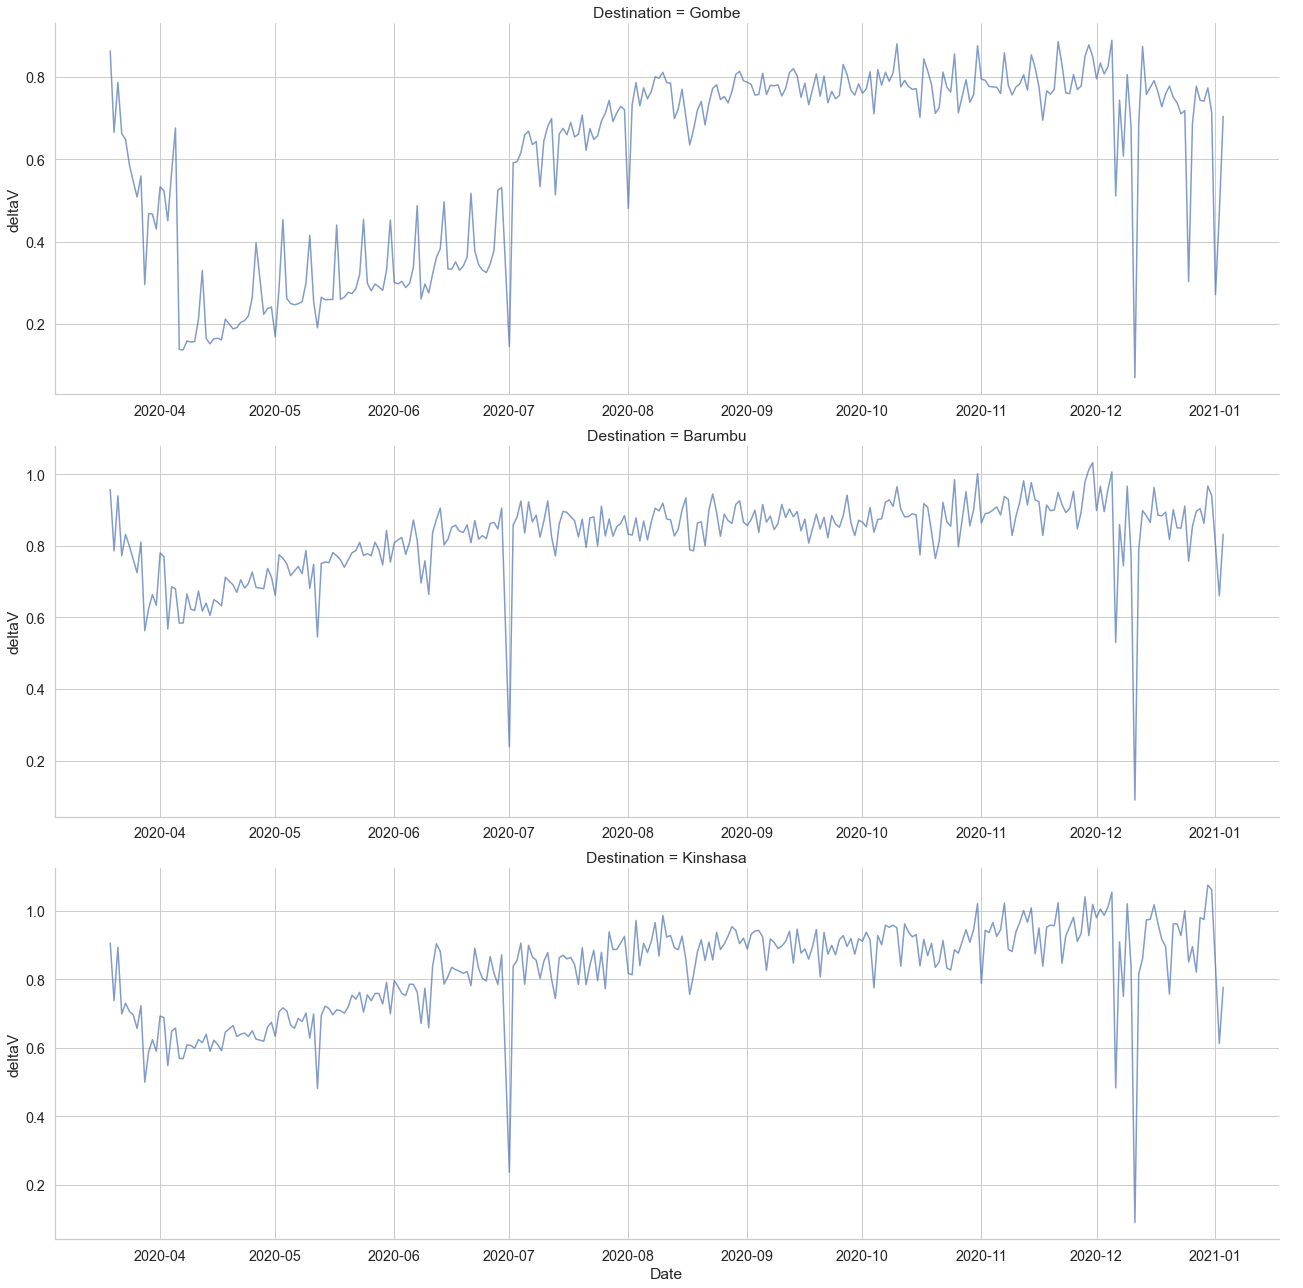

In [345]:
# Plot movement reduction for some zones
selected_zones = ['Kinshasa','Gombe','Barumbu']
g = sns.FacetGrid(df_trend[df_trend.Destination.isin(selected_zones)], row="Destination",aspect=3,height=6,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

# Presence Data

In [346]:
# reading csv file
dfp = pd.read_csv('../../data/export_csv/Presence_24h.csv',sep = ';')
dfp

,Date,Day_type,PresenceType,Type,Activity_Zone,Home_Zone,Zone,Volume
0,2020-02-01,WE,Jour,Local,Hors_Zone,Hors_Zone,Kole,10302
1,2020-02-01,WE,Nuit,Local,Hors_Zone,Hors_Zone,Kole,3863
2,2020-02-01,WE,Jour,Local,Kole,Hors_Zone,Kole,9014
3,2020-02-01,WE,Nuit,Local,Kole,Hors_Zone,Kole,1931
4,2020-02-01,WE,Nuit,Local,Omendjadi,Hors_Zone,Kole,1287
...,...,...,...,...,...,...,...,...
9816922,2021-01-03,WE,Jour,Etranger,Hors_Zone,Hors_Zone,Bikoro,180
9816923,2021-01-03,WE,Nuit,Etranger,Hors_Zone,Hors_Zone,Bikoro,90
9816924,2021-01-03,WE,Jour,Etranger,Bikoro,Hors_Zone,Bikoro,30
9816925,2021-01-03,WE,Nuit,Etranger,Bikoro,Bolomba,Bikoro,30


In [347]:
#Duplicates check
dfp[dfp.duplicated()]

,Date,Day_type,PresenceType,Type,Activity_Zone,Home_Zone,Zone,Volume
1495518,2020-03-20,JO,Jour,Local,Kananga,Hors_Zone,Lubunga,180


In [348]:
#Convert to Date

dfp['Date'] = pd.to_datetime(dfp['Date'])

In [349]:
#filter by selected zones

dfp_filtered = dfp[dfp['Zone'].isin(list_filtered_zones)]
dfp_filtered

,Date,Day_type,PresenceType,Type,Activity_Zone,Home_Zone,Zone,Volume
0,2020-02-01,WE,Jour,Local,Hors_Zone,Hors_Zone,Kole,10302
1,2020-02-01,WE,Nuit,Local,Hors_Zone,Hors_Zone,Kole,3863
2,2020-02-01,WE,Jour,Local,Kole,Hors_Zone,Kole,9014
3,2020-02-01,WE,Nuit,Local,Kole,Hors_Zone,Kole,1931
4,2020-02-01,WE,Nuit,Local,Omendjadi,Hors_Zone,Kole,1287
...,...,...,...,...,...,...,...,...
9816922,2021-01-03,WE,Jour,Etranger,Hors_Zone,Hors_Zone,Bikoro,180
9816923,2021-01-03,WE,Nuit,Etranger,Hors_Zone,Hors_Zone,Bikoro,90
9816924,2021-01-03,WE,Jour,Etranger,Bikoro,Hors_Zone,Bikoro,30
9816925,2021-01-03,WE,Nuit,Etranger,Bikoro,Bolomba,Bikoro,30


In [350]:
df_agg_dzp = dfp_filtered.groupby(["Date","Zone",'PresenceType'],as_index=0).sum()
df_agg_dzp

,Date,Zone,PresenceType,Volume
0,2020-02-01,Aba,Jour,218493
1,2020-02-01,Aba,Nuit,124624
2,2020-02-01,Adi,Jour,4849
3,2020-02-01,Adi,Nuit,2696
4,2020-02-01,Alimbongo,Jour,23999
...,...,...,...,...
192894,2021-01-03,Yambuku,Nuit,183659
192895,2021-01-03,Yangala,Jour,156361
192896,2021-01-03,Yangala,Nuit,213836
192897,2021-01-03,Zongo,Jour,157201


In [351]:
dfp_agg_f_day = df_agg_dzp#[df_agg_dzp.PresenceType == 'Nuit']
dfp_agg_date_zone = dfp_agg_f_day.groupby(by=['Date','Zone'],as_index=0).sum()
dfp_agg_date_zone

,Date,Zone,Volume
0,2020-02-01,Aba,343117
1,2020-02-01,Adi,7545
2,2020-02-01,Alimbongo,37887
3,2020-02-01,Angumu,23018
4,2020-02-01,Ankoro,112264
...,...,...,...
96700,2021-01-03,Yakusu,74166
96701,2021-01-03,Yaleko,10297
96702,2021-01-03,Yambuku,518396
96703,2021-01-03,Yangala,370197


In [352]:
# dfp_agg_f_night = df_agg_dzp[df_agg_dzp.PresenceType == 'Nuit']
# dfp_agg_f_day = df_agg_dzp[df_agg_dzp.PresenceType == 'Day']

In [353]:
# dfp_agg_f_night

### Merging Presence and Movement

In [368]:
df_mvt_pres = df_filtered_both.merge(dfp_agg_date_zone,left_on=['Origin','Date'], right_on=['Zone','Date'])

#Total movers per day from an origin
df_mvt_pres_filtered = (df_mvt_pres[['Date','Origin', 'Volume_x']].groupby(by=['Date','Origin'], as_index=False).sum()).rename(columns={'Volume_x':'tot_from_origin'})
df_mvt_pres = df_mvt_pres.merge(df_mvt_pres_filtered,left_on=['Origin','Date'], right_on=['Origin','Date'])
#Proportion of movers
df_mvt_pres['move_prop'] = df_mvt_pres['Volume_x']/ df_mvt_pres['Volume_y'] # Proportion with respect to presence in the corresponding day
df_mvt_pres['move_prop_tot'] = df_mvt_pres['Volume_x']/ df_mvt_pres['tot_from_origin'] # Proportion with respect to total from origin in the corresponding day

# df_mvt_pres[(df_mvt_pres.Date == '2020-02-1') & (df_mvt_pres.Origin == 'Haut-Lomami')]
# # df_mvt_pres[(df_mvt_pres.Origin == 'Kinshasa') ]
# # df_mvt_pres

df_mvt_pres_perc = df_mvt_pres[['Date','Origin','Destination','move_prop','move_prop_tot']]#.to_csv('./epidemiological_model/BEARmod_DRC/data/WB/mobmat.csv')
df_mvt_pres_perc.to_csv('./epidemiological_model/BEARmod_DRC/data/WB/mobmat.csv')

In [370]:
# Population staying home
df_mvt_pres_perc_tot = df_mvt_pres_perc.groupby(['Date','Origin'], as_index=False).sum()
df_mvt_pres_perc_tot['move_prop'] = 1 - df_mvt_pres_perc_tot['move_prop']
df_mvt_pres_perc_tot[['Date','Origin','move_prop']].to_csv('./epidemiological_model/BEARmod_DRC/data/WB/mobmat_stay_home.csv')

In [374]:
df_mvt_pres_perc_tot[df_mvt_pres_perc_tot.move_prop < 0]

,Date,Origin,move_prop,move_prop_tot
1563,2020-02-07,Lusangi,-1.000000,1.0
5791,2020-02-22,Lusangi,-1.000000,1.0
6080,2020-02-23,Mangala,-0.471204,1.0
16442,2020-04-02,Kole,-3.001661,1.0
16957,2020-04-04,Kapanga,-0.266436,1.0
...,...,...,...,...
87340,2020-12-20,Kalonge,-0.017742,1.0
88427,2020-12-24,Kalonge,-0.449584,1.0
88618,2020-12-25,Bafwasende,-0.029496,1.0
90049,2020-12-30,Kalonda Est,-1.000000,1.0


In [375]:
df_mvt_pres_perc_tot.describe()

,move_prop,move_prop_tot
count,91322.000000,9.132200e+04
mean,0.810161,1.000000e+00
std,0.163791,8.909139e-17
min,-16.750000,1.000000e+00
25%,0.724326,1.000000e+00
50%,0.827983,1.000000e+00
75%,0.923069,1.000000e+00
max,0.999992,1.000000e+00


In [235]:
df_mvt_epi = df_mvt_pres.merge(df_pats, left_on='Origin', right_on='patNames')
df_mvt_epi = df_mvt_epi.merge(df_pats, left_on='Destination', right_on='patNames')
df_mvt_epi.drop(['patNames_x','patNames_y','Observation_Zone','Zone'],axis=1, inplace=True) #,'Date_day'
#"fr_users","movers"
df_mvt_epi.rename(columns={'Date':'date','Volume_x':'movers','patIDs_x':'fr_pat','patIDs_y':'to_pat','Volume_y':'fr_users'}, inplace=True)
df_mvt_epi

,date,Origin,Destination,Date_day,movers,fr_users,move_prop,fr_pat,to_pat
0,2020-02-01,Aba,Gombari,5,32953,343117,0.096040,1,71
1,2020-02-02,Aba,Gombari,6,29839,375315,0.079504,1,71
2,2020-02-03,Aba,Gombari,0,16505,347256,0.047530,1,71
3,2020-02-04,Aba,Gombari,1,19008,333046,0.057073,1,71
4,2020-02-06,Aba,Gombari,3,21043,361657,0.058185,1,71
...,...,...,...,...,...,...,...,...,...
926287,2020-12-25,Mukanga,Kinkondja,4,271,256335,0.001057,229,146
926288,2020-12-13,Mulongo,Kinkondja,6,270,118310,0.002282,231,146
926289,2020-12-14,Mulongo,Kinkondja,0,251,117042,0.002145,231,146
926290,2020-12-17,Mulongo,Kinkondja,3,262,145287,0.001803,231,146


Trying to repeate mobility pattern for missing date

In [843]:
df_mvt_epi_wo_npi = df_mvt_epi[df_mvt_epi.date<'2020-03-18']
df_mvt_epi_wo_npi

,date,Origin,Destination,Date_day,movers,fr_users,move_prop,fr_pat,to_pat
0,2020-01-31,Aba,Gombari,4,394,23091,0.017063,1,71
1,2020-02-01,Aba,Gombari,5,1597,20819,0.076709,1,71
2,2020-02-02,Aba,Gombari,6,1152,19838,0.058070,1,71
3,2020-02-03,Aba,Gombari,0,915,17416,0.052538,1,71
4,2020-02-04,Aba,Gombari,1,759,18486,0.041058,1,71
...,...,...,...,...,...,...,...,...,...
384910,2020-02-07,Ubundu,Yaleko,4,62,135104,0.000459,294,310
384911,2020-02-13,Ubundu,Yaleko,3,59,134078,0.000440,294,310
384912,2020-03-10,Yakusu,Yaleko,1,178,491178,0.000362,309,310
384914,2020-02-17,Vanga Kete,Lomela,0,225,17427,0.012911,298,177


In [856]:
zone_w_issue

['Bena Tshiadi',
 'Bena Leka',
 'Demba',
 'Ndekesha',
 'Mikalayi',
 'Bunkonde',
 'Kananga',
 'Mutoto',
 'Lubunga',
 'Minga',
 'Ototo',
 'Dikungu',
 'Tshumbe',
 'Yangala',
 'Masuika',
 'Dibaya',
 'Lubondaie',
 'Luiza',
 'Bilomba',
 'Luambo',
 'Katako Kombe',
 'Wembo Nyama',
 'Djalo Djeka',
 'Lodja',
 'Vanga Kete',
 'Kole',
 'Omendjadi',
 'Lomela',
 'Yabaondo',
 'Makiso-Kisangani',
 'Lubunga',
 'Ubundu',
 'Yaleko',
 'Wanierukula',
 'Banalia',
 'Bengamisa',
 'Kabondo',
 'Yakusu',
 'Isangi',
 'Basoko',
 'Yahuma',
 'Bafwasende']

In [850]:
df_mvt_w_issue = df_mvt_epi_wo_npi[(df_mvt_epi_wo_npi['Origin'].isin(zone_w_issue)) | (df_mvt_epi_wo_npi['Destination'].isin(zone_w_issue)) ]

In [855]:
df_mvt_w_issue[df_mvt_w_issue.isna()]

,date,Origin,Destination,Date_day,movers,fr_users,move_prop,fr_pat,to_pat
1158,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1171,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1173,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
384906,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384910,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384911,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384912,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for missing dates

In [844]:
# pd.date_range('2020-01-31','2020-03-17',)
def check_missing_dates(df,start,end):
    return set([d.strftime('%Y-%m-%d') for d in pd.date_range(start,end,)]) - set(df.date.dt.date.astype(str))

In [845]:
# df_mvt_epi[df_mvt_epi.date == '2020-03-18']

In [846]:
df_mvt_epi_wo_npi[df_mvt_epi_wo_npi.date == '2020-02-05']

,date,Origin,Destination,Date_day,movers,fr_users,move_prop,fr_pat,to_pat


In [847]:
check_missing_dates(df_mvt_epi_wo_npi,'2020-01-31','2020-03-17')

{'2020-02-05', '2020-02-28', '2020-03-02'}

In [694]:
def slide_df(df,interval, unit):
    df_copy = pd.DataFrame(df, copy=True)
    df_copy['date'] = df_copy['date'] + pd.Timedelta(interval, unit)
    df_copy_slid = df_copy[df_copy.date > df.date.max()]
    return pd.concat([df,df_copy_slid], axis=0)

In [695]:
df_mvt_epi_wo_npi_slid = pd.DataFrame(df_mvt_epi_wo_npi, copy=True)
df_mvt_epi_wo_npi_slid['date'] = df_mvt_epi_wo_npi_slid ['date'] + pd.Timedelta(6, 'W')
df_mvt_epi_wo_npi_slid

,date,Origin,Destination,Date_day,movers,fr_users,move_prop,fr_pat,to_pat
0,2020-03-13,Aba,Gombari,4,394,23091,0.017063,1,68
1,2020-03-14,Aba,Gombari,5,1597,20819,0.076709,1,68
2,2020-03-15,Aba,Gombari,6,1152,19838,0.058070,1,68
3,2020-03-16,Aba,Gombari,0,915,17416,0.052538,1,68
4,2020-03-17,Aba,Gombari,1,759,18486,0.041058,1,68
...,...,...,...,...,...,...,...,...,...
333452,2020-03-20,Ubundu,Yaleko,4,62,135104,0.000459,269,284
333453,2020-03-26,Ubundu,Yaleko,3,59,134078,0.000440,269,284
333454,2020-04-21,Yakusu,Yaleko,1,178,491178,0.000362,283,284
333456,2020-03-30,Vanga Kete,Lomela,0,225,17427,0.012911,272,164


In [696]:
df_mvt_epi_slid = df_mvt_epi_slid[df_mvt_epi_slid.date > df_mvt_epi_wo_npi.date.max()] #>= df_mvt_epi_wo_npi.date.max()
df_mvt_epi_slid

,date,Origin,Destination,Date_day,movers,fr_users,move_prop,fr_pat,to_pat
5,2020-03-19,Barumbu,Binza Meteo,3,3685,512062,0.007196,1,2
6,2020-03-20,Barumbu,Binza Meteo,4,3125,520750,0.006001,1,2
7,2020-03-21,Barumbu,Binza Meteo,5,3184,526311,0.006050,1,2
8,2020-03-22,Barumbu,Binza Meteo,6,2500,466664,0.005357,1,2
9,2020-03-23,Barumbu,Binza Meteo,0,3177,496327,0.006401,1,2
...,...,...,...,...,...,...,...,...,...
118876,2020-04-24,Selembao,Barumbu,4,1302,794033,0.001640,29,1
118877,2020-04-25,Selembao,Barumbu,5,982,776578,0.001265,29,1
118878,2020-04-26,Selembao,Barumbu,6,652,794235,0.000821,29,1
118879,2020-04-27,Selembao,Barumbu,0,1497,769480,0.001945,29,1


In [697]:
#Sliding data until december 2020

df_mvt_wo_npi_slid = slide_df(df_mvt_epi_wo_npi,6, 'W')
df_mvt_wo_npi_slid = slide_df(df_mvt_wo_npi_slid,12, 'W')
df_mvt_wo_npi_slid = slide_df(df_mvt_wo_npi_slid,16, 'W')
df_mvt_wo_npi_slid

,date,Origin,Destination,Date_day,movers,fr_users,move_prop,fr_pat,to_pat
0,2020-01-31,Aba,Gombari,4,394,23091,0.017063,1,68
1,2020-02-01,Aba,Gombari,5,1597,20819,0.076709,1,68
2,2020-02-02,Aba,Gombari,6,1152,19838,0.058070,1,68
3,2020-02-03,Aba,Gombari,0,915,17416,0.052538,1,68
4,2020-02-04,Aba,Gombari,1,759,18486,0.041058,1,68
...,...,...,...,...,...,...,...,...,...
333452,2020-10-02,Ubundu,Yaleko,4,62,135104,0.000459,269,284
333453,2020-10-08,Ubundu,Yaleko,3,59,134078,0.000440,269,284
333454,2020-11-03,Yakusu,Yaleko,1,178,491178,0.000362,283,284
333456,2020-10-12,Vanga Kete,Lomela,0,225,17427,0.012911,272,164


In [698]:
check_missing_dates(df_mvt_wo_npi_slid,'2020-01-31','2020-12-08')

{'2020-02-05',
 '2020-02-28',
 '2020-03-02',
 '2020-03-18',
 '2020-04-10',
 '2020-04-13',
 '2020-04-29',
 '2020-05-22',
 '2020-05-25',
 '2020-06-10',
 '2020-07-03',
 '2020-07-06',
 '2020-07-31',
 '2020-08-03',
 '2020-08-19',
 '2020-09-11',
 '2020-09-14',
 '2020-09-30',
 '2020-10-23',
 '2020-10-26',
 '2020-11-11',
 '2020-11-12',
 '2020-11-13',
 '2020-11-14',
 '2020-11-15',
 '2020-11-16',
 '2020-11-17',
 '2020-11-18',
 '2020-11-19',
 '2020-11-20',
 '2020-11-21',
 '2020-11-22',
 '2020-11-23',
 '2020-11-24',
 '2020-11-25',
 '2020-11-26',
 '2020-11-27',
 '2020-11-28',
 '2020-11-29',
 '2020-11-30',
 '2020-12-01',
 '2020-12-02',
 '2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08'}

In [699]:
# df_mvt_epi[(df_mvt_epi.Origin == 'Gombe')].mean()

In [700]:
df_mvt_wo_npi_slid[(df_mvt_wo_npi_slid.Origin == 'Gombe')&(df_mvt_wo_npi_slid.date == '2020-11-08')].describe()

,Date_day,movers,fr_users,move_prop,fr_pat,to_pat
count,32.0,32.00000,32.0,32.000000,32.0,32.000000
mean,6.0,3901.81250,411217.0,0.009488,69.0,149.500000
std,0.0,3629.75455,0.0,0.008827,0.0,64.480054
min,6.0,21.00000,411217.0,0.000051,69.0,13.000000
25%,6.0,1329.75000,411217.0,0.003234,69.0,116.750000
50%,6.0,2877.00000,411217.0,0.006996,69.0,151.000000
75%,6.0,5070.00000,411217.0,0.012329,69.0,192.750000
max,6.0,12526.00000,411217.0,0.030461,69.0,259.000000


In [701]:
# df_mvt_epi[(df_mvt_epi.Origin == 'Kinshasa') & (df_mvt_epi.date == '2020-03-27')]['move_prop'].sum()

### Save OD matrix to csv

In [702]:
df_mvt_wo_npi_slid[(df_mvt_wo_npi_slid.date >= '2020-07-04')&((df_mvt_wo_npi_slid.date <= '2020-11-09'))][['date','Origin','Destination','fr_pat', 'to_pat','movers','fr_users','move_prop']].to_csv('./epidemiological_model/BEARmod_DRC/data/mobmat.csv')

# BEARmod
Basic Epidemic, Activity, and Response COVID-19 model

This model implements a basic SEIR simulation model, accounting for variable daily movement patterns, recovery rates, and contact rates. Demonstration of this model can be seen in a recent Nature paper [1]

For a placeholder dummy dataset and example simulation run, please see "run_model_small.R", which uses a dummy movement dataset "testmove.csv"

## Overall model
This model is a metapopulation model of COVID-19 transmission, based on an SEIR modeling framework. Within each patch, this model follows a fairly simple SEIR framework. The primary complexities this model is designed to describe are daily movement patterns, and spatially and temporally heterogeneous reductions in movement and contact rates. Specifically, this model is particularly suited for data that generally come from mobile phone companies.

### Baseline patch-level processes
Within each patch, this model first calculates the number of infected people who recovered or were otherwise removed from the infectious population (ie. through self-isolatuion) at an average rate r, where r is equal to the inverse of the average infectious period. This is explicitly incorporated as a Bernoulli trial for each infected person with a probability of recovering 1-exp⁡(-r). 
Then, the model converts exposed people to infectious by similarly incorporating a Bernoulli trial for each exposed individual, where the daily probability of becoming infectious 1-exp⁡(-ε), where ε was the inverse of the average time spent exposed but not infectious. 
Finally, to end the exposure, infection, and recovery step of the model, newly exposed people are calculated for each city based on the number of infectious people in the city I_i, and the average number of daily contacts that lead to transmission that each infectious person has c. This model then simulates the number of newly exposed people through a random draw from a Poisson distribution for each infectious person where the mean number of new infections per person was c, which was then multiplied by the fraction of people in the patch who are susceptible.
The infection processes within each patch therefore approximate the following deterministic, continuous-time model, where c and r varied through time:
dS/dt=S-c SI/N
dE/dt=c SI/N-εE
dI/dt=εE-rI
dR/dt=rI

### Movement between patches
After completing the infection-related processes, the model moves infectious people between cities, using the proportion of people who went from each patch to each other patch measured in the input OD matrix. Infectious people are moved from their current location to each possible destination (including remaining in the same place) using Bernoulli trials for each infectied person, and each possible destination city. 
Through this model, stochasticity in the numbers and places where COVID-19 appears between simulation runs in this model through variance in numbers of people becoming exposed, infectious, and removed/recovered, as well as variance in numbers of people moving from one city to another.

## Input options and formats
Note: These parameter specifications are relevant for v 0.92, denoted at the top of the bearmod_fx.R file.

First, you will create an empty population list HPop, using InitiatePop(). This function takes as inputs:
- pat_locator: A data frame with variables "patNames", "patIDs" (numeric; sequential from 1:number of patches), and "pop" (population per patch)
- initialInf: A vector of initially infected people per patch, length equal to the number of patches
- initialExp: A vector of initially exposed people per patch, length equal to the number of patches

The initial HPop is then fed into the runSim function, which has the following inputs:
- HPop
- pat_info: This is the same as pat_locator
- movement_reduction_df: a data frame with 3 variables, "date", "name", and "relative_movement". "name" corresponds to the patNames ID for the patch, and "relative_movement" indicates the relative proportion of movement for that day--.3 means all movement for that patch in that day (both incoming and outgoing) will be 30% of the baseline value (specified in mobmat later). This is specified on a per-day basis, and does not have to be complete--any missing day/patch pairs will have 100% of the baseline movement patterns
- contact_reduction_df: a data frame with 3 variables, "date", "name", and "relative_contact". Same as movement_reduction_df except this refers to the relative contact rate within a patch for a given day--ie. .5 means half as many contacts per person
- mobmat: A data frame with variables "date", "fr_pat", "to_pat", "move_prop". fr_pat and to_pat refer to the patch IDs of the origin and destination patches (see patIDs from pat_locator), and move_prop is the proportion of people who move from each origin to each destination on the given day in "date". If stayers are not denoted (origin = destination), then the model will designate this as 1 - sum(movement elsewhere) for a given patch. 

--more parameter definitions coming soon--

Contact:
Nick W Ruktanonchai; 
nrukt00 at gmail.com

[1] Lai, S., Ruktanonchai, N.W., Zhou, L. et al. Effect of non-pharmaceutical interventions to contain COVID-19 in China. Nature (2020). https://doi.org/10.1038/s41586-020-2293-x
